In [6]:
%matplotlib inline
import os
import glob
import warnings
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from os.path import join, normcase

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None


In [7]:
"""
    Distance estimation
"""
def LB_Keogh(s1, s2, r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [8]:
"""
    Dynamic Time Warping similarity
"""

def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [9]:
"""
    Dynamic Time Warping similarity with window
"""
def DTWDistanceWithWindow(s1, s2, w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])


In [22]:
"""
    Set dirs
"""
cwd = os.getcwd()
data_dir = join(cwd, 'data')
file_in = join(data_dir, 'load_model_3months_better.csv')
data = pd.read_csv(file_in)

# lowercase column names and status column
data.columns = [x.lower() for x in data.columns]
to_lower = ['status']
data[to_lower] = data[to_lower].apply(lambda x: x.str.lower())

data.head(100)

,index,power,status,unitid
0,2017-03-03 14:47:15-08:00,0.000000,plugin,0100000100000046495017126501
1,2017-03-03 14:47:20-08:00,5.809206,chargingstart,0100000100000046495017126501
2,2017-03-03 14:50:00-08:00,5.809206,chargingstart,0100000100000046495017126501
3,2017-03-03 14:55:00-08:00,5.809206,chargingstart,0100000100000046495017126501
4,2017-03-03 15:00:00-08:00,5.809206,chargingstart,0100000100000046495017126501
5,2017-03-03 15:05:00-08:00,5.809206,chargingstart,0100000100000046495017126501
6,2017-03-03 15:10:00-08:00,5.809206,chargingstart,0100000100000046495017126501
7,2017-03-03 15:15:00-08:00,5.809206,chargingstart,0100000100000046495017126501
8,2017-03-03 15:20:00-08:00,5.809206,chargingstart,0100000100000046495017126501
9,2017-03-03 15:25:00-08:00,5.809206,chargingstart,0100000100000046495017126501


In [19]:
"""
    Create a device vs. datetime matrix with number of bids
"""

df_ts = data.pivot(index='unitid', columns='index')[['power']].fillna(0.0)
df_ts.columns = df_ts.columns.get_level_values(1)
df_ts.head()

ValueError: Index contains duplicate entries, cannot reshape

In [8]:
sums = df_ts.apply(lambda x: np.sum(x), axis=1).to_frame(name='weekly_bids')
sums.head()

,weekly_bids
device_id,
0000320b-d2de-4b0c-b0f5-6e4851bdf364,3.0
00006c0b-8fd4-48d9-825e-5e81342b29c7,8.0
00007acd-499c-4fc6-b40a-b573e4663496,3.0
00008bd3-668b-4a31-8e81-fabb3ba1b2c3,11.0
0000d692-eda6-4960-91ed-b20887efe033,212.0


In [9]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler(with_mean=True, with_std=True)
sums['log_weekly_bids'] = np.log(sums.weekly_bids)
sums['log_weekly_bids_std'] = scaler.fit_transform(sums.log_weekly_bids.values.reshape(-1, 1))

sums.head()

,weekly_bids,log_weekly_bids,log_weekly_bids_std
device_id,,,
0000320b-d2de-4b0c-b0f5-6e4851bdf364,3.0,1.098612,-1.098742
00006c0b-8fd4-48d9-825e-5e81342b29c7,8.0,2.079442,-0.524371
00007acd-499c-4fc6-b40a-b573e4663496,3.0,1.098612,-1.098742
00008bd3-668b-4a31-8e81-fabb3ba1b2c3,11.0,2.397895,-0.337885
0000d692-eda6-4960-91ed-b20887efe033,212.0,5.356586,1.394715


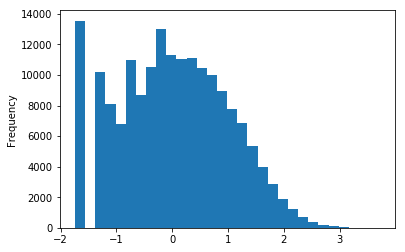

In [10]:
sums.log_weekly_bids_std.plot(kind='hist', bins=30)

In [11]:
"""
    DTW
"""
"""
from itertools import combinations


pairs = combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)
dtws = pd.DataFrame([
    [x[0], x[1], DTWDistance(df_ts[df_ts.index == x[0]].values[0], df_ts[df_ts.index == x[1]].values[0])]  
    for x in combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)
], columns=['device01', 'device02', 'dtw'])
"""

"\nfrom itertools import combinations\n\n\npairs = combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)\ndtws = pd.DataFrame([\n    [x[0], x[1], DTWDistance(df_ts[df_ts.index == x[0]].values[0], df_ts[df_ts.index == x[1]].values[0])]  \n    for x in combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)\n], columns=['device01', 'device02', 'dtw'])\n"

In [12]:
"""
    DTW with window
"""
"""
from itertools import combinations


pairs = combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)
window_size = 8
dtws['dtw_window'] = pd.DataFrame([
    [x[0], x[1], DTWDistanceWithWindow(df_ts[df_ts.index == x[0]].values[0], df_ts[df_ts.index == x[1]].values[0], window_size)]  
    for x in combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)
], columns=['device01', 'device02', 'dtw'])['dtw']
"""

"\nfrom itertools import combinations\n\n\npairs = combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)\nwindow_size = 8\ndtws['dtw_window'] = pd.DataFrame([\n    [x[0], x[1], DTWDistanceWithWindow(df_ts[df_ts.index == x[0]].values[0], df_ts[df_ts.index == x[1]].values[0], window_size)]  \n    for x in combinations(sums[sums.log_weekly_bids_std >= 3].index, 2)\n], columns=['device01', 'device02', 'dtw'])['dtw']\n"

In [115]:
sums.loc[sums.log_weekly_bids_std > 2.8, ['weekly_bids']].describe()

,weekly_bids
count,160.000000
mean,3315.831250
std,1264.107074
min,2338.000000
25%,2542.000000
50%,2953.000000
75%,3558.750000
max,11103.000000


In [ ]:
from itertools import combinations, permutations


sdt = 2
window_size = 3
dtws = pd.DataFrame([
    [x[0], x[1], LB_Keogh(df_ts[df_ts.index == x[0]].values[0], df_ts[df_ts.index == x[1]].values[0], window_size)]  
    for x in permutations(sums[sums.log_weekly_bids_std > sdt].index, 2)
], columns=['device01', 'device02', 'dtw_lb'])

In [ ]:
import re

columns = ['device01', 'device02', 'dtw_lb']
# dtws.loc[dtws.dtw_lb > 0, columns].sort_values(['dtw_lb'], ascending=[1])
dtws.loc[:, columns].sort_values(['dtw_lb'], ascending=[1])

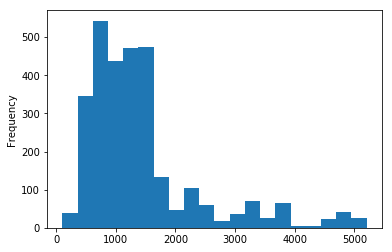

In [117]:
dtws.dtw_lb.plot(kind='hist', bins=20)

In [32]:
train.head()

device02,02286711-3719-44d9-9105-1f65e3166b81,05400255-c0df-4b23-bd9b-be16798494a3,069e410e-b6ce-488e-b59b-505eb93bc890,0cc57ed0-0b64-433b-9ca9-15dd46c35660,12d0b135-601a-4b4e-8b4a-6104b74df372,2212b07d-6974-40fe-8d5a-dffe84ee8a63,23e830c2-fc23-4f16-8f14-c2ba406ac6a9,2c27972c-045c-4a75-aa90-392f4e0fb8d9,2f28388f-91a5-472c-a7bf-d3f172d7bd18,31b9b8db-0863-41dd-9556-22a453bad536,327d37ab-f32f-4de4-98b9-ff1ffd3e7baa,340b656c-cce1-43b0-a70c-9bc411dab79a,3b8da378-6be9-4477-89e5-ff12c78718dd,413469a7-b084-45bb-8cdb-cdcf9babcd98,440940ff-3246-40d1-b3d5-29f98c9b81e3,481a2e04-9d3d-4fbc-b104-f0ee2296a022,488a95bc-a614-482f-b885-892d6388cf74,4ae5a375-a2d5-4ecb-88d3-4bdb3bff0653,4b6b8db5-c483-42c6-bc18-0738ac823175,4cb21cf6-ecd3-45cf-9836-c8104dec8f43,4d1762bf-c6de-4569-ac0b-cb92fc0f1719,4f23c706-6be0-46a8-82a1-4757d51ba085,583d0251-bfad-40df-a40f-0a34e0054d83,6873799e-531a-4e5c-94f1-1c677b7cbcb5,6d930848-ba03-4d9a-9702-1309929b2120,725ed6f5-9753-4675-83c7-1ad4ff0103a3,72d2f7a5-904c-4f6a-b3c4-03a6af0ac507,78b6f816-fd95-4fab-b045-f941c3e7e63b,81bfe02f-61dc-4b1a-804d-10afcc18dfa2,8308d968-85a1-4cc4-be5c-9331cdfd70f4,8325ee97-8019-49f3-b28b-c47e5da90f28,85fed733-a1c3-465c-a3bb-e27447eb345d,8dd2b2aa-4f31-4647-af5e-0c6e62e6dea2,92325747-7d00-493a-a82b-d14923883ad5,953e8837-bd23-4a05-b0c0-72a290508bda,9540ff72-cf53-452b-9f79-394b1157b345,a55661eb-51a7-4eb6-b94e-0ad6a3e73af5,a707a055-7249-469d-862c-333701fcabe5,aba500e1-cf18-4b63-8b71-e44ff23e51b4,b62a2d30-0521-4a63-a7ec-2985bd733df4,b68cef27-e133-48eb-a806-9d9f1571a73c,b9817387-24cb-4dd2-8977-16ae19f6c32c,ba693cfe-440b-4023-aeed-982bb6ffa1fe,bc0039f0-021c-4869-a13e-67f55ad541d1,be4b8df2-dac6-41af-9e93-f30607520c8a,c11aa9dd-6da3-436c-b909-73ea581adf93,c3faf880-075f-47f4-a4bf-8ecc4c723600,cfc4c7a1-5977-4453-b972-4608c06ebc5a,d5606b0e-63fd-4b3d-9476-2ee2877d659c,df184466-47d2-426c-8c3f-01a322f46bbb,e19835e5-9ca5-4b39-a2d0-9b30143db4fc,e37dbc3f-b8fe-4cbd-a787-64672828629a,e74b620b-7f25-4b2c-9ad7-ea2f35037e1b,e97a75ab-4b2f-4fa9-9d67-95079ec32fb8,f9c893d6-9b45-43d6-b307-4ea1d6f83881
device01,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02286711-3719-44d9-9105-1f65e3166b81,0.000000,772.698518,886.559079,700.279230,737.548642,652.287513,702.604441,669.004484,833.729572,923.706122,699.248883,615.627322,654.955724,682.992679,883.372515,794.316058,629.661020,499.297507,699.152344,597.303106,731.807352,810.654057,1733.624815,753.151379,604.446855,772.846686,813.905400,854.543738,793.518116,812.641988,630.257090,446.021300,600.430679,694.332773,644.235982,702.913935,860.704944,928.659787,628.660481,751.753949,611.028641,677.383200,584.965811,504.995049,775.448902,923.138126,739.901345,636.446384,870.985649,834.273936,683.063687,816.826787,761.836597,742.544275,756.762843
05400255-c0df-4b23-bd9b-be16798494a3,1348.317470,0.000000,839.917258,1063.579334,627.701362,1377.949927,1407.014925,1166.270123,1325.349388,1410.197149,1213.637096,1369.946714,1390.047841,1397.356791,1410.546348,1327.092687,1392.336525,1373.357929,1321.900904,1301.272454,667.526778,1349.298707,2018.229918,1408.060013,1362.457706,801.250897,1044.645394,1166.028730,650.733432,1343.735837,1365.632088,1291.106889,1246.245562,1230.115035,1363.946113,1261.338971,1374.026201,1405.457221,1333.687370,1267.755497,1399.876423,1300.574104,1215.673476,1335.015356,1418.177351,1419.916195,1367.733527,1302.054914,1402.751938,539.992593,1107.693098,1348.794276,1179.161567,1383.781413,1403.038488
069e410e-b6ce-488e-b59b-505eb93bc890,1583.398876,1333.017254,0.000000,1196.677902,1326.896379,1535.211386,1351.610891,1172.251679,573.851026,1646.990285,1025.193640,1575.996193,1636.253648,1633.022351,1632.386596,1564.585568,1490.476098,1481.460766,1606.582398,1480.125670,1269.947243,1570.533986,2194.436830,1475.938684,1604.513945,914.917483,141.127602,1288.509216,1333.044260,1636.146387,1573.377259,1515.861471,1495.564776,1452.346377,1138.634270,1410.236860,944.200191,1636.283594,1618.335565,1603.450966,1183.971283,1410.990787,1486.054508,1509.034791,1015.

In [118]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# .apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
columns = ['device01', 'device02', 'dtw_lb']

train = pd.concat([
    dtws[columns[:2]].apply(lambda x: x.astype('category')),
    dtws[columns[2:]]], axis=1)\
    .pivot(index='device01', columns='device02')[['dtw_lb']].fillna(0.0)
train.columns = train.columns.get_level_values(1)
cl = DBSCAN(metric='precomputed', min_samples=20)
# cl = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='precomputed')
# cl = KMeans(n_clusters=5)

c = pd.DataFrame(cl.fit_predict(train.as_matrix()).reshape(-1, 1), columns=['cluster'], index=train.index)
c.groupby(['cluster']).agg({'cluster': 'count'})

,cluster
cluster,
-1,55


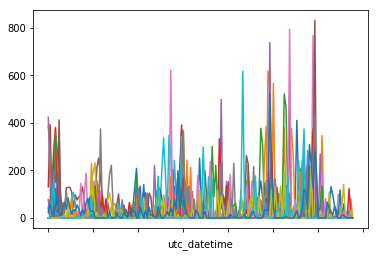

In [112]:
cluster_id = 4
df_ts[df_ts.index.isin(c[c.cluster == cluster_id].index)].T.plot(legend=False)

In [106]:
df_ts[df_ts.index.isin(c[c.cluster == cluster_id].index)]

utc_datetime,2018-05-05 05:00:00,2018-05-05 06:00:00,2018-05-05 07:00:00,2018-05-05 08:00:00,2018-05-05 09:00:00,2018-05-05 10:00:00,2018-05-05 11:00:00,2018-05-05 12:00:00,2018-05-05 13:00:00,2018-05-05 14:00:00,2018-05-05 15:00:00,2018-05-05 16:00:00,2018-05-05 17:00:00,2018-05-05 18:00:00,2018-05-05 19:00:00,2018-05-05 20:00:00,2018-05-05 21:00:00,2018-05-05 22:00:00,2018-05-05 23:00:00,2018-05-06 00:00:00,2018-05-06 01:00:00,2018-05-06 02:00:00,2018-05-06 03:00:00,2018-05-06 04:00:00,2018-05-06 05:00:00,2018-05-06 06:00:00,2018-05-06 07:00:00,2018-05-06 08:00:00,2018-05-06 09:00:00,2018-05-06 10:00:00,2018-05-06 11:00:00,2018-05-06 12:00:00,2018-05-06 13:00:00,2018-05-06 14:00:00,2018-05-06 15:00:00,2018-05-06 16:00:00,2018-05-06 17:00:00,2018-05-06 18:00:00,2018-05-06 19:00:00,2018-05-06 20:00:00,2018-05-06 21:00:00,2018-05-06 22:00:00,2018-05-06 23:00:00,2018-05-07 00:00:00,2018-05-07 01:00:00,2018-05-07 02:00:00,2018-05-07 03:00:00,2018-05-07 04:00:00,2018-05-07 05:00:00,2018-05-07 06:00:00,2018-05-07 07:00:00,2018-05-07 08:00:00,2018-05-07 09:00:00,2018-05-07 10:00:00,2018-05-07 11:00:00,2018-05-07 12:00:00,2018-05-07 13:00:00,2018-05-07 14:00:00,2018-05-07 15:00:00,2018-05-07 16:00:00,2018-05-07 17:00:00,2018-05-07 18:00:00,2018-05-07 19:00:00,2018-05-07 20:00:00,2018-05-07 21:00:00,2018-05-07 22:00:00,2018-05-07 23:00:00,2018-05-08 00:00:00,2018-05-08 01:00:00,2018-05-08 02:00:00,2018-05-08 03:00:00,2018-05-08 04:00:00,2018-05-08 05:00:00,2018-05-08 06:00:00,2018-05-08 07:00:00,2018-05-08 08:00:00,2018-05-08 09:00:00,2018-05-08 10:00:00,2018-05-08 11:00:00,2018-05-08 12:00:00,2018-05-08 13:00:00,2018-05-08 14:00:00,2018-05-08 15:00:00,2018-05-08 16:00:00,2018-05-08 17:00:00,2018-05-08 18:00:00,2018-05-08 19:00:00,2018-05-08 20:00:00,2018-05-08 21:00:00,2018-05-08 22:00:00,2018-05-08 23:00:00,2018-05-09 00:00:00,2018-05-09 01:00:00,2018-05-09 02:00:00,2018-05-09 03:00:00,2018-05-09 04:00:00,2018-05-09 05:00:00,2018-05-09 06:00:00,2018-05-09 07:00:00,2018-05-09 08:00:00,2018-05-09 09:00:00,2018-05-09 10:00:00,2018-05-09 11:00:00,2018-05-09 12:00:00,2018-05-09 13:00:00,2018-05-09 14:00:00,2018-05-09 15:00:00,2018-05-09 16:00:00,2018-05-09 17:00:00,2018-05-09 18:00:00,2018-05-09 19:00:00,2018-05-09 20:00:00,2018-05-09 21:00:00,2018-05-09 22:00:00,2018-05-09 23:00:00,2018-05-10 00:00:00,2018-05-10 01:00:00,2018-05-10 02:00:00,2018-05-10 03:00:00,2018-05-10 04:00:00,2018-05-10 05:00:00,2018-05-10 06:00:00,2018-05-10 07:00:00,2018-05-10 08:00:00,2018-05-10 09:00:00,2018-05-10 10:00:00,2018-05-10 11:00:00,2018-05-10 12:00:00,2018-05-10 13:00:00,2018-05-10 14:00:00,2018-05-10 15:00:00,2018-05-10 16:00:00,2018-05-10 17:00:00,2018-05-10 18:00:00,2018-05-10 19:00:00,2018-05-10 20:00:00,2018-05-10 21:00:00,2018-05-10 22:00:00,2018-05-10 23:00:00,2018-05-11 00:00:00,2018-05-11 01:00:00,2018-05-11 02:00:00,2018-05-11 03:00:00,2018-05-11 04:00:00,2018-05-11 05:00:00,2018-05-11 06:00:00,2018-05-11 07:00:00,2018-05-11 08:00:00,2018-05-11 09:00:00,2018-05-11 10:00:00,2018-05-11 11:00:00,2018-05-11 12:00:00,2018-05-11 13:00:00,2018-05-11 14:00:00,2018-05-11 15:00:00,2018-05-11 16:00:00,2018-05-11 17:00:00,2018-05-11 18:00:00,2018-05-11 19:00:00,2018-05-11 20:00:00,2018-05-11 21:00:00,2018-05-11 22:00:00,2018-05-11 23:00:00,2018-05-12 00:00:00,2018-05-12 01:00:00,2018-05-12 02:00:00,2018-05-14 00:00:00,2018-05-14 01:00:00,2018-05-14 02:00:00,2018-05-14 03:00:00
device_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02286711-3719-44d9-9105-1f65e3166b81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,55.0,4.0,15.0,10.0,39.0,49.0,131.0,209.0,64.0,134.0,10.0,22.0,106.0,76.0,19.0,8.0,2.0,21.0,8.0,1.0,8.0,45.0,84.0,64.0,47.0,2.0,0.0,0.0,133.0,128.0,22.0,213.0,373.0,187.0,101.0,156.0,2.0,21.0,29.0,23.0,2